In [12]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('full_spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA


sil=dict()
sil[512]=[]
sil[1024]=[]
sil[2048]=[]
sil[4096]=[]

cal=dict()
cal[512]=[]
cal[1024]=[]
cal[2048]=[]
cal[4096]=[]

dav=dict()
dav[512]=[]
dav[1024]=[]
dav[2048]=[]
dav[4096]=[]

ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

for n_pca in (512,1024,2048,4096):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    connectivity = grid_to_graph(n_x=nx, n_y=ny)
    for n_clusters_ in ns_clusters_:
        ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
        labels = ward.labels_
        #sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
        sil[n_pca].append(metrics.silhouette_score(pca_features,labels))
        cal[n_pca].append(metrics.calinski_harabasz_score(pca_features,labels))
        dav[n_pca].append(metrics.davies_bouldin_score(pca_features,labels))

np.save("sil",sil)
np.save("cal",cal)
np.save("dav",dav)


Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


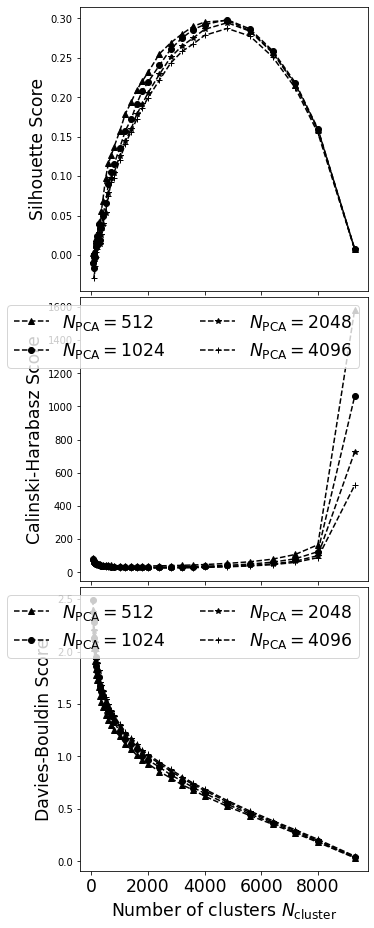

In [15]:
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0, right=1./3,bottom=0,top=1., wspace=0.002,hspace=0.02)#,sharex=True)

#ns_pca=(512,1024,2048,4096)


ax1 = fig.add_subplot(gs[0,0])
t1,=ax1.plot(ns_clusters_,sil[512],'k^--')
t2,=ax1.plot(ns_clusters_,sil[1024],'ko--')
t3,=ax1.plot(ns_clusters_,sil[2048],'k*--')
t4,=ax1.plot(ns_clusters_,sil[4096],'k+--')

#ax1.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc=(-0.2,1.01))
#ax1.text("(a)")

ax1.set_ylabel("Silhouette Score",size='xx-large')


ax2 = fig.add_subplot(gs[1,0], sharex=ax1)
t1,=ax2.plot(ns_clusters_,cal[512],'k^--')
t2,=ax2.plot(ns_clusters_,cal[1024],'ko--')
t3,=ax2.plot(ns_clusters_,cal[2048],'k*--')
t4,=ax2.plot(ns_clusters_,cal[4096],'k+--')

ax2.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")
ax2.set_ylabel("Calinski-Harabasz Score",size='xx-large')
#ax2.tick_params(labelbottom=False)


ax3 = fig.add_subplot(gs[2,0], sharex=ax1)
t1,=ax3.plot(ns_clusters_,dav[512],'k^--')
t2,=ax3.plot(ns_clusters_,dav[1024],'ko--')
t3,=ax3.plot(ns_clusters_,dav[2048],'k*--')
t4,=ax3.plot(ns_clusters_,dav[4096],'k+--')
ax3.set_ylabel("Davies-Bouldin Score",size='xx-large')

ax3.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")

ax3.tick_params(axis='x', labelsize= "xx-large")
ax3.set_xlabel("Number of clusters $N_{\mathrm{cluster}}$",size='xx-large')

plt.savefig('fig10.tif',format='tif',bbox_inches ='tight')

In [21]:
print(np.array(sil[512]).argmax())
print(ns_clusters_[26])

print(np.array(cal[512]).argmin())
print(ns_clusters_[18])


26
4800
18
1600


In [65]:
#print(metrics.silhouette_score(pca_features,labels))
print(metrics.calinski_harabasz_score(pca_features,labels))
#print(metrics.davies_bouldin_score(pca_features,labels))

ValueError: Number of labels is 9344. Valid values are 2 to n_samples - 1 (inclusive)

In [11]:
s=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,9600,800)]
print(s)
print(len(s))

[50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400, 500, 600, 700, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2400, 2800, 3200, 3600, 4000, 4800, 5600, 6400, 7200, 8000, 8800]
32
